<a href="https://colab.research.google.com/github/CameronwBates/Quick-Practice-Projects/blob/main/Test_Forecasting_with_sample_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
df.head()


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


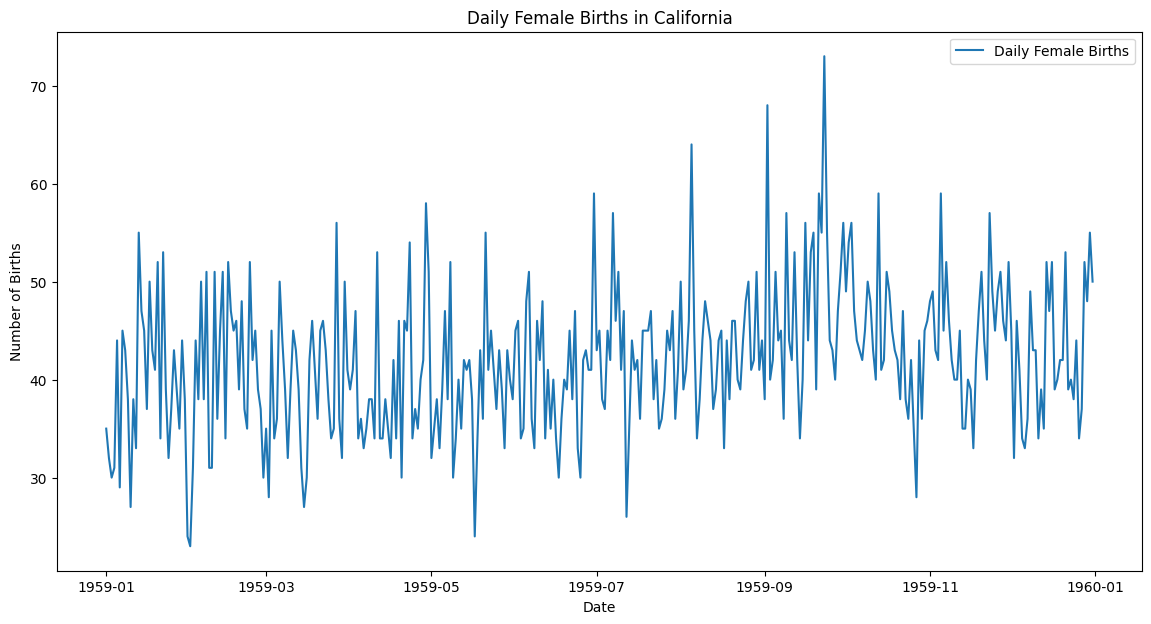

In [4]:
# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Births'], label='Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Daily Female Births in California')
plt.legend()
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Births'], order=(5,1,0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


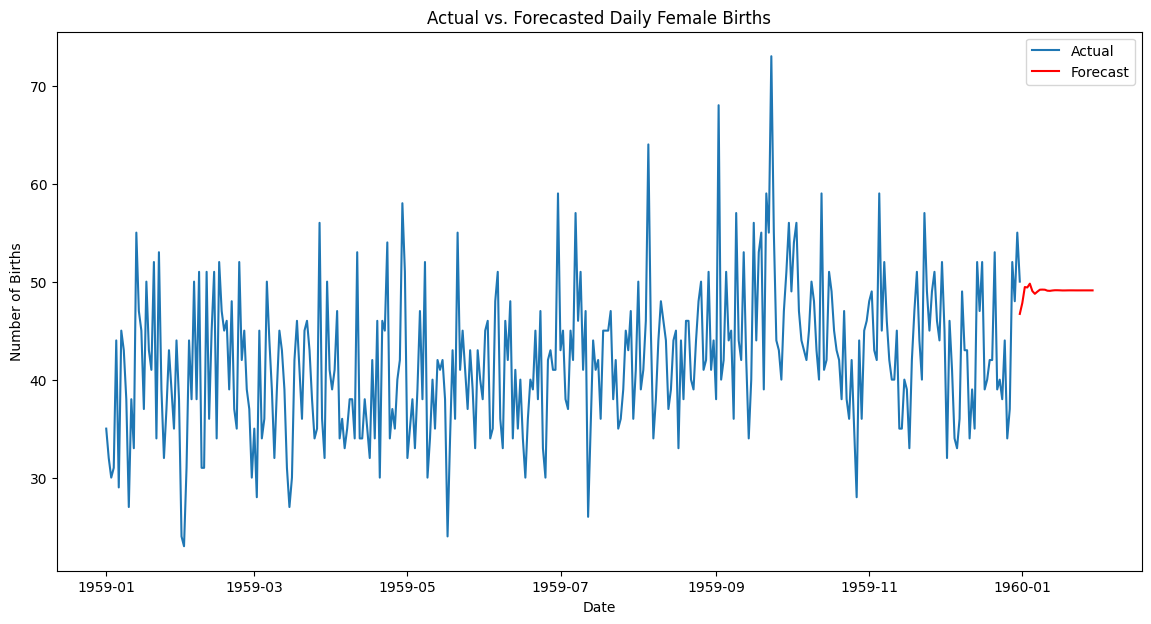

In [11]:
# Create a date range for the forecasted values
forecast_dates = pd.date_range(start=df.index[-1], periods=30)

# Plot the actual and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Births'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Actual vs. Forecasted Daily Female Births')
plt.legend()
plt.show()
